 # Notes and exercises from [Nielsen2015](http://neuralnetworksanddeeplearning.com/)
 ---

 ## Ch. 3 Improvements

 ## Sec. 3.1 The Cross-Entropy Cost Function

 Learning slows down since $\frac{\partial C}{\partial w}$
 and $\frac{\partial C}{\partial b}$ scale linearly with $\sigma^\prime(z)$,
 which is nearly flat $\forall z > 0$.

 Solution: Use the *cross-entropy* cost function

 $C = \frac{1}{n} \sum\limits_x C_x$

 $C_x = -[\mathbf{y} \ln \mathbf{a} + (1 - \mathbf{y}) \ln(1 - \mathbf{a})]$

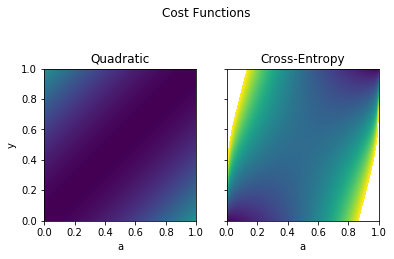

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

A, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
C1 = (Y - A)**2
C2 = -(Y*np.log(A + 0.001) + (1 - Y)*np.log(1 - A + 0.001))

fig = plt.figure(1)
fig.suptitle('Cost Functions')
ax = fig.add_subplot(1, 2, 1)
cp = ax.contourf(A, Y, C1, np.arange(0, 2, 0.01))
ax.set_title('Quadratic')
ax.set_xlabel('a')
ax.set_xlim(0, 1)
ax.set_ylabel('y')
ax.set_ylim(0, 1)
ax.set_aspect('equal')

ax = fig.add_subplot(1, 2, 2)
cp = ax.contourf(A, Y, C2, np.arange(0, 2, 0.01))
ax.set_title('Cross-Entropy')
ax.set_xlabel('a')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.tick_params(axis = 'y', labelleft = False)

plt.show()


 Taking the derivatives (assuming a 3-input, 1-layer, 1-neuron network):

 $\frac{\partial C_x}{\partial w_j} = \ldots = x_j (\sigma(z) - y) = x_j (a - y)$

 $\frac{\partial C_x}{\partial b} = \ldots = (a - y)$

 This means that, given such $C$, the learning rates are proportional
 to the output error, better than just on $\sigma^\prime(z)$.

 Generalizing to a many-neuron, $N$-layer network:

 $C_x = - \sum\limits_i [ y_i \ln(a_i^N) + (1 - y_i) \ln(1 - a_i^N)] $



 ## Sec. 3.2 Softmax